# **0. Group 8**

- Rachma Dwi Oktaviani
- Indana Zulfa
- Ade Safarudin Madani
- Vina Siallagan
- Rizki Ramadhani

# **1. Perkenalan Dataset**

- **Sumber Dataset**:  
   Sumber dataset yang digunakan adalah **Data Analysis on Diamonds Dataset** dari repositori Kaggle dengan link berikut https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond

- **Tentang Dataset**:  
   Dataset prediksi harga berlian dengan 53940 baris dan 10 kolom (fitur).

- **Key Feature**:  
   Untuk fitur kunci (Key Feature) yang disajikan berikut menggunakan Bahasa Inggris sesuai dengan bahasa dokumentasi dataset agar tidak salah menafsirkan makna dari dataset aslinya.

| Feature   | Description                                                                 |
|-----------|-----------------------------------------------------------------------------|
| **price** | Price of diamonds in US dollars (\$326–\$18,823)                            |
| **carat** | Weight of the diamond (0.2–5.01)                                            |
| **cut**   | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)                  |
| **color** | Color of the diamond, with D being the best and J the worst                 |
| **clarity**| Measurement of how clear the diamond is (I1 (worst) to IF (best))          |
| **depth %**| Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)         |
| **table %**| Width of top of diamond relative to widest point (43–95)                   |
| **x**     | Length in mm (0–10.74)                                                     |
| **y**     | Width in mm (0–58.9)                                                       |
| **z**     | Depth in mm (0–31.8)                                                      |

- **Legends**: https://myza.com/blogs/myza/how-to-choose-the-perfect-diamond-proportions-for-your-engagement-ring

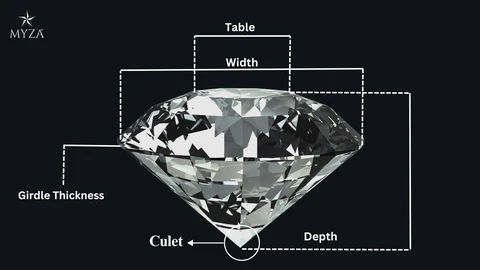

- **Objektif**:  
   Membuat pemodelan regression untuk prediksi harga berlian (diamond).

# **2. Import Library**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

# Modeling
import pickle
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# **3. Memuat Dataset**

In [2]:
!curl -L -o /content/price-prediction-of-diamond.zip\
  https://www.kaggle.com/api/v1/datasets/download/swatikhedekar/price-prediction-of-diamond

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  733k  100  733k    0     0   719k      0  0:00:01  0:00:01 --:--:-- 46.6M


In [3]:
!unzip /content/price-prediction-of-diamond.zip

Archive:  /content/price-prediction-of-diamond.zip
  inflating: diamonds.csv            


In [4]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **4. Exploratory Data Analysis (EDA)**

## **4.1. Memahami Struktur Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Insight**:
- Pada dataset memiliki 11 fitur dengan 8 fitur numerik dan 3 fitur kategorik dengan jumlah data sebanyak 53940 baris data.

In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Insight**:
-

## **4.2. Menangani Missing Value**

In [7]:
df.isna().any()

,0
Unnamed: 0,False
carat,False
cut,False
color,False
clarity,False
depth,False
table,False
price,False
x,False
y,False


**Insight**:
- Setelah melakukan cek pada missing value, tidak terdapat nilai yang hilang/kosong.

## **4.3. Duplicated Data**

In [8]:
print("Jumlah duplikat pada dataset:", df.duplicated().sum())

Jumlah duplikat pada dataset: 0


**Insight**:
- Pada dataset juga tidak terdapat data yang terduplikasi, secara umum dataset dalam keadaan baik.

In [9]:
# numerical column
num_col = df.select_dtypes(include=['int64', 'float64'])
num_col.head()

,Unnamed: 0,carat,depth,table,price,x,y,z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# categorical column
cat_col = df.select_dtypes(include='object')
cat_col.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


## **4.4. Unique Values Check**

In [11]:
# check unique value for categorical column
def unique_categorical_values(df, column):
    """
    Prints the number and list of unique values for a specified
    categorical column in a Pandas DataFrame.

    Args:
        dataset(pd.DataFrame): The Pandas DataFrame.
        column_name(str): The name of the categorical column.
    """
    try:
        print(f"Number of unique {column}: {(df[column].nunique())}")
        print(f"Unique {column}:")
        for value in df[column].unique():
            print(f"- {value}")
    except KeyError:
        print(f"Error: Column '{column}' not found in the dataset.")

In [12]:
unique_categorical_values(df, 'cut')

Number of unique cut: 5
Unique cut:
- Ideal
- Premium
- Good
- Very Good
- Fair


**Insight**:
- Berdasarkan deskripsi dari fitur 'cut' dari sumber dataset, fitur 'cut' mendeskripsikan kualitas dari potongan berlian dengan urutan Fair (terburuk), Good, Very Good, Premium hingga Ideal (terbaik).
- Untuk memudahkan fitur ini untuk diintepretasi oleh model, perlu dilakukan label encoding dengan urutan kualitas tersebut.

In [13]:
unique_categorical_values(df, 'color')

Number of unique color: 7
Unique color:
- E
- I
- J
- H
- F
- G
- D


**Insight**:
- Fitur 'color' mendeskripsikan kualitas warna dari berlian, kualitas ini diurutkan secara alfabetis dimulai dari D (terbaik) hingga Z (terburuk). Bila disesuaikan dengan dataset ini, maka urutan kualitasnya D, E, F, G, H, I dan J dengan warna D sebagai kualitas terbaik dan warna J kualitas terburuk.
- Untuk memudahkan model dalam intepretasi nilai kualitas warna tersebut perlu dilakukan label encoding.

**Note**:
- Untuk lebih memahami lebih jauh maksud dari fitur ini, kami menggunakan referensi tambahan dari tautan berikut
https://www.gia.edu/diamond-quality-factor


In [14]:
unique_categorical_values(df, 'clarity')

Number of unique clarity: 8
Unique clarity:
- SI2
- SI1
- VS1
- VS2
- VVS2
- VVS1
- I1
- IF


**Insight**:
- Fitur 'clarity' mendeskripsikan mengenai kejernihan dari berlian dengan urutan I1, SI2, SI1, VS2, VS1, VVS2, VVS1 dan IF dimana I1 (Included 1) memiliki kualitas terburuk dan IF (Internally Flawless) memiliki kualitas terbaik.
- Kualitas ini ditinjau dari inclusion (cacat internal karena gelembung gas, mineral lain atau retaakn) dan Blemishes (cacat eksternal seperti goresan atau lecet). Untuk memudahkan model nantinya dalam intepretasi hasil ini perlu dilakukan label encoding.

**Note**:
- Untuk lebih memahami lebih jauh maksud dari fitur ini, kami menggunakan referensi tambahan dari tautan berikut
https://www.gia.edu/diamond-quality-factor


## **4.5. Analisis Distribusi & Korelasi**

### **4.5.1. Check Target Variables Distribution**

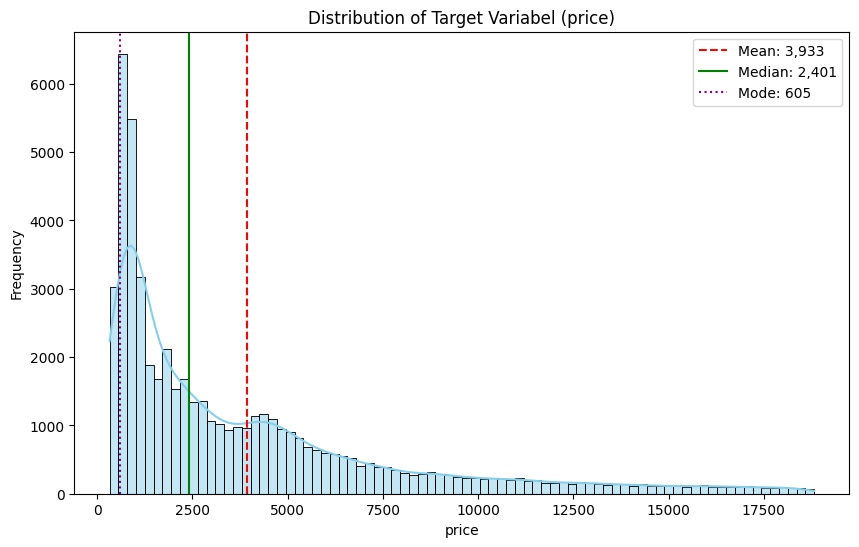

In [15]:
# Target kolom
target_column = 'price'

# Hitung statistik
mean = df[target_column].mean()
median = df[target_column].median()
mode = df[target_column].mode()[0]  # mode bisa punya lebih dari satu nilai

# Plot distribusi
plt.figure(figsize=(10, 6))
sns.histplot(df[target_column], kde=True, color='skyblue')

# Tambahkan garis statistik
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:,.0f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:,.0f}')
plt.axvline(mode, color='purple', linestyle=':', label=f'Mode: {mode:,.0f}')

# Judul dan label
plt.title(f'Distribution of Target Variabel ({target_column})')
plt.xlabel(target_column)
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Insight**:
- Berdasarkan grafik distribusi dari variabel target yakni price, terlihat bahwa distribusi data cenderung right-skewed, yang ditunjukkan oleh hubungan nilai modus < median < mean.
- Hal ini mengindikasikan bahwa sebagian besar berlian dalam dataset memiliki harga pada kisaran menengah ke bawah, sementara hanya sebagian kecil yang memiliki harga sangat tinggi.
- Sehingga perlu penanganan distribusi right-skewed misalnya dengan log transform.
- Dalam konteks pengembangan model prediksi harga berlian, hasil ini menunjukkan perlunya analisis lebih lanjut terhadap variabel-variabel yang berkontribusi signifikan terhadap nilai harga (price).

### **4.5.1. Univariat Analysis**

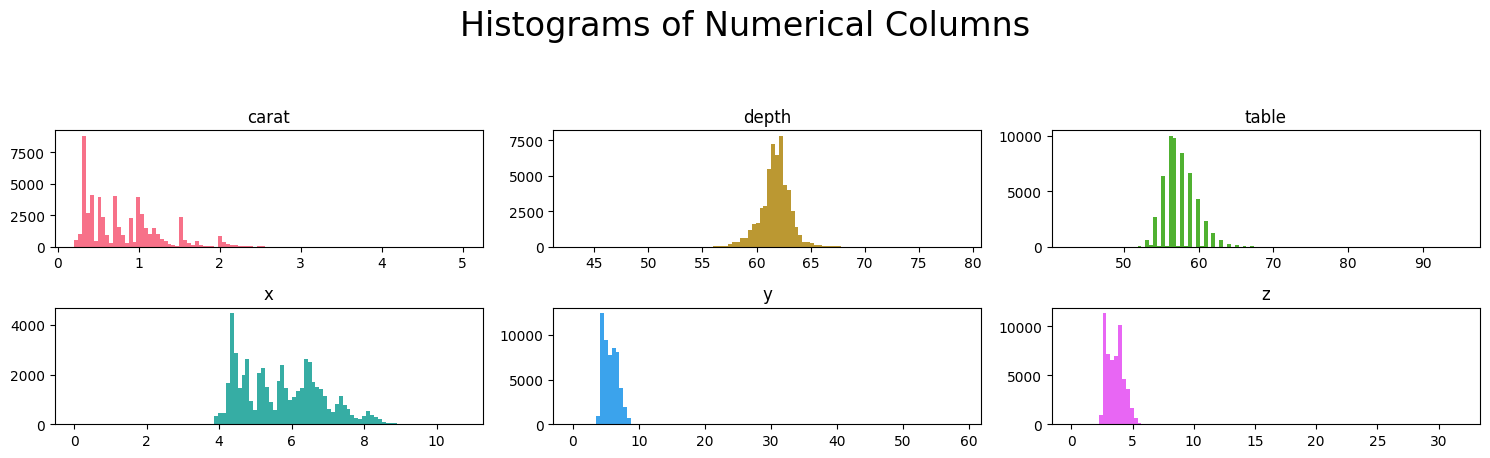

In [16]:
# Define a color palette with distinct colors
num_cols = [
    'carat',
    'depth',
    'table',
    'x',
    'y',
    'z'
]

dataset2 = df[num_cols]

palette = sns.color_palette("husl", len(num_cols))

# Histogram:
fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Histograms of Numerical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif"
)

for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    # Use the color palette for each subplot
    plt.hist(
        dataset2.iloc[:, i],
        bins=vals,
        color=palette[i]
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight**:
- carat: Distribusi carat tampak right-skewed (positively skewed), dengan sebagian besar nilai berkumpul pada kisaran kecil (sekitar 0.2–1.0) dan hanya sebagian kecil berlian yang memiliki berat carat besar (>2). Hal ini mengindikasikan bahwa mayoritas berlian dalam dataset memiliki ukuran kecil hingga sedang.

- depth: Distribusinya terlihat mendekati normal (simetris), dengan puncak di sekitar nilai 61–63. Tidak banyak outlier ekstrem yang terlihat, sehingga kolom ini cukup stabil dan mungkin tidak memerlukan transformasi khusus. Ini menunjukkan bahwa mayoritas berlian memiliki kedalaman (depth) dalam kisaran yang ideal.

- table: Distribusinya cenderung slightly right-skewed, dengan mayoritas nilai berada pada rentang 55–60.
Namun terdapat sedikit outlier di kanan (nilai tinggi), yang perlu diperhatikan saat melakukan analisis lebih lanjut.

- x dan y tampak right-skewed, dengan puncak distribusi antara 4–6 dan beberapa outlier yang mencapai nilai >10 (mungkin data error atau outlier). z (tinggi) juga menunjukkan right-skewed, dengan nilai mayoritas di bawah 6.

- Fitur-fitur yang memiliki nilai tidak terdistribusi normal perlu dilakukan log transform agar model nantinya tidak salah dalam intepretasi data.

In [17]:
def categorical_distribution(df, column):
    """
    Plot the distribution of a categorical column in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The Pandas DataFrame.
        column (str): The name of the categorical column to visualize.

    Raises:
        ValueError: If the specified column is not found in the DataFrame.
        TypeError: If the specified column is not categorical or has inappropriate data.
    """
    try:
        # Condition : column not in df
        if column not in df.columns:
            raise ValueError(f"Column '{column}' not found in DataFrame.")

        # Condition : trigger when not use object column
        if not df[column].dtype.name in ['object', 'category']:
            raise TypeError(f"Column '{column}' must be categorical or a type that can be counted.")

        # Sort value
        order = df[column].value_counts().index

        # Plot
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(
            data=df,
            x=column,
            hue=column,
            order=order,
            palette='viridis'
        )

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()

        for p in ax.patches:
            ax.annotate(
                f'\n{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,12),
                textcoords='offset points'
            )

        plt.show()

    except Exception as e:
        print(f"Error to show data distribution: {e}")


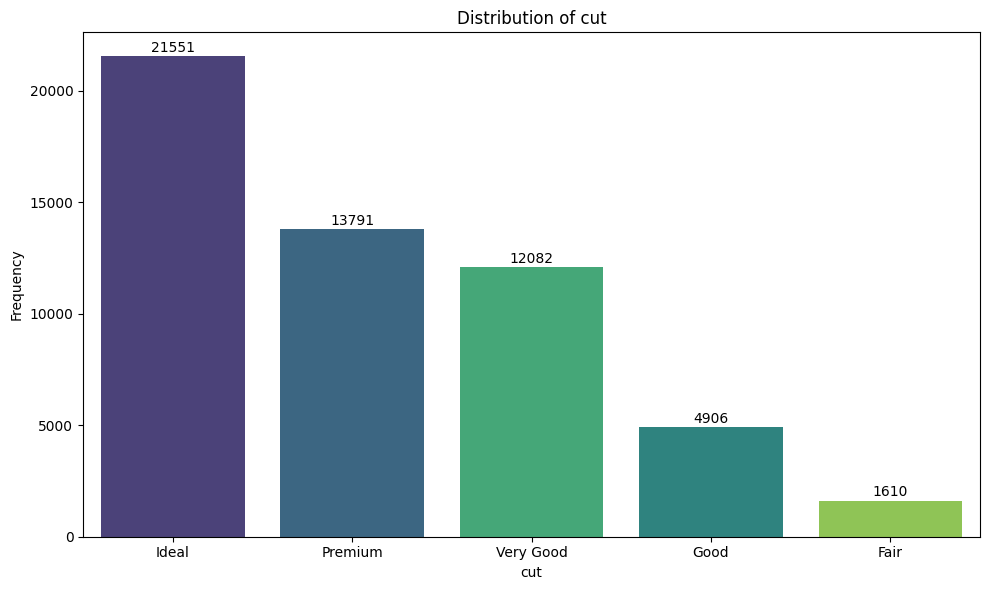

In [18]:
categorical_distribution(df=df, column='cut')

**Insight**:
- Distribusi dari kualitas potongan (cut) berlian dalam dataset menunjukkan pola bahwa kualitas potongan 'ideal' paling banyak diantara kualitas yang lain dengan jumlah 21.551 data. Hal ini dapat menunjukkan bahwa kualitas potongan ini kemungkinan paling disukai atau paling sering diproduksi karena tampilannya yang berkilau dan menarik secara visual.
- Kemudian kualitas 'premium' dan 'very good' juga cukup banyak ditemukan. Hal ini bisa diasumsikan bahwa kualitas ini masih bagus dengan harga yang lebih terjangkau.
- Untuk kualitas 'fair' sendiri memiliki jumlah yang paling sedikit karena kurang disukai atau kualitasnya yang buruk.

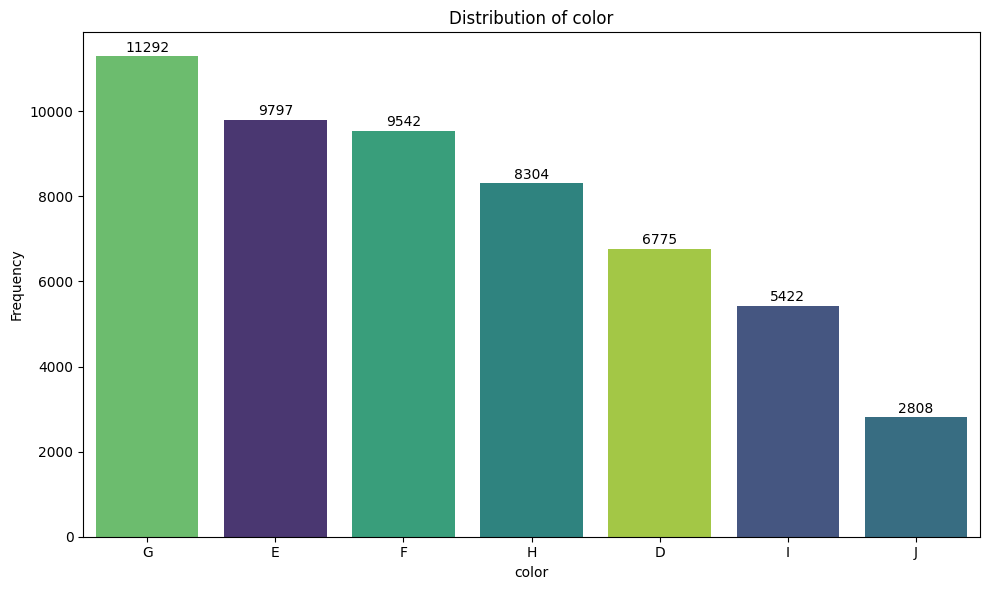

In [19]:
categorical_distribution(df=df, column='color')

**Insight**:
- Distribusi dari warna (color) berlian dalam dataset menunjukkan bahwa warna G paling banyak ditemukan, dengan jumlah 11.292 data. Ini bisa menunjukkan bahwa warna G merupakan tingkat kejernihan yang sedang-sedang saja, tidak terlalu kuning tapi juga belum yang paling jernih, sehingga mungkin jadi pilihan populer karena harganya lebih terjangkau tapi masih terlihat cukup bening.
- Kemudian warna E dan F juga cukup mendominasi, masing-masing dengan jumlah 9.797 dan 9.542 data. Ini menunjukkan bahwa berlian dengan warna yang cukup bening juga banyak diproduksi atau dibeli, kemungkinan karena tetap memberikan tampilan visual yang bagus namun dengan harga yang tidak semahal kualitas tertinggi.
- Untuk warna D jumlahnya tidak banyak yakni 6.775 data atau 1/8 dari keseluruhan data. Hal ini mungkin disebabkan oleh harga berlian dengan kualitas terbaik yang cenderung tinggi, sehingga tidak banyak orang yang memilihnya karena harganya yang relatif mahal.
- Secara keseluruhan, data ini menunjukkan bahwa warna berlian di tingkat menengah (seperti G, E, dan F) lebih banyak dipilih karena kemungkinan dengan keseimbangan antara harga dengan kualitas visual yang berikan.

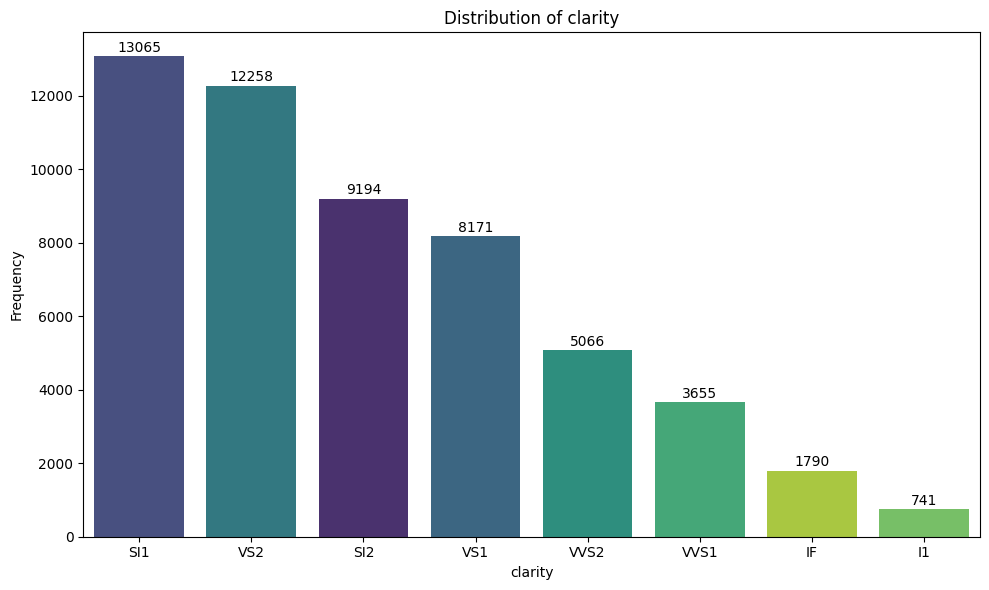

In [20]:
categorical_distribution(df=df, column='clarity')

**Insight**:
- Distribusi dari kejernihan (clarity) berlian dalam dataset menunjukkan bahwa kualitas SI1 (Slightly Included 1) paling banyak ditemukan, dengan jumlah 13.065 data. Ini bisa menunjukkan bahwa berlian dengan tingkat kejernihan sedang namun masih terlihat bagus secara visual menjadi yang paling banyak dipilih.
- Sementara itu, kualitas IF (Internally Flawless) yang merupakan tingkat kejernihan terbaik justru hanya ditemukan sebanyak 1.790 data, dan I1 (Included 1) yang merupakan kualitas terburuk paling jarang dipilih.
- Secara umum, pola dari grafik ini menunjukkan bahwa berlian yang dipilih di pasaran lebih banyak dengan kualitas menengah karena mempertimbangkan harga yang terjangkau dan kualitas yang cukup baik.

### **4.5.3. Bivariat Analysis**

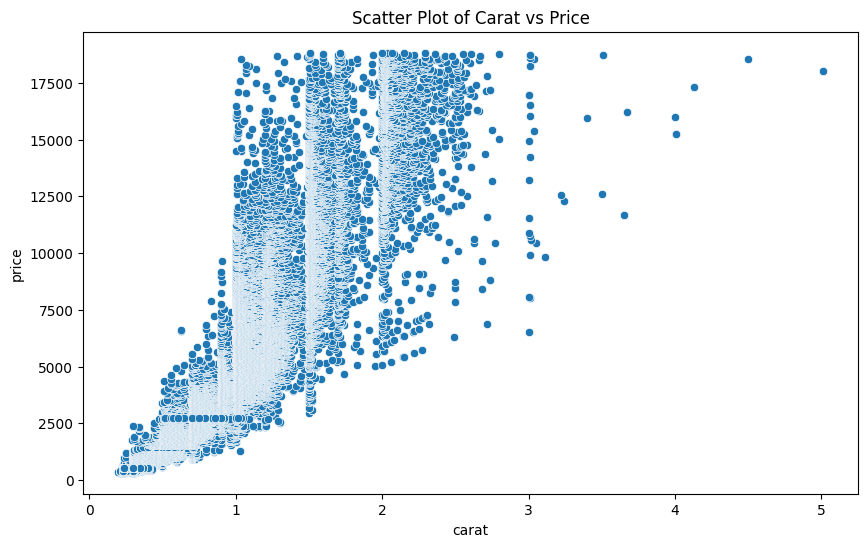

In [21]:
# carat vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price')
plt.title('Scatter Plot of Carat vs Price')
plt.show()

**Insight**:
- Dari persebaran data, terlihat bahwa hubungan antara carat dan price cenderung padat pada rentang carat 0 hingga 2, menunjukkan bahwa sebagian besar berlian memiliki berat dalam kisaran tersebut.

- Terdapat beberapa titik data dengan nilai carat antara 3 hingga 5 yang menyimpang dari mayoritas distribusi. Titik-titik ini dapat dianggap sebagai outlier, karena jumlahnya sedikit dan memiliki harga yang jauh lebih tinggi.

In [22]:
def categorical_bivariat_distribution(df, x_col, hue_col, manual_order):
    """
    Plot two subplots of the distribution of two categorical columns in a Pandas DataFrame.
    - First plot: Sorted by frequency (auto)
    - Second plot: Uses manual order provided by user

    Args:
        df (pd.DataFrame): The Pandas DataFrame.
        x_col (str): The name of the categorical column for the x-axis.
        hue_col (str): The name of the categorical column for the hue (grouping).
        manual_order (list): Manual order of categories for the second subplot.

    Raises:
        ValueError: If columns not found or types are wrong.
    """
    try:
        for col in [x_col, hue_col]:
            if col not in df.columns:
                raise ValueError(f"Column '{col}' not found in DataFrame.")
            if not df[col].dtype.name in ['object', 'category']:
                raise TypeError(f"Column '{col}' must be categorical.")

        fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

        # First plot: sorted by frequency
        order_freq = df[x_col].value_counts().index
        sns.countplot(data=df, x=x_col, hue=hue_col, order=order_freq, ax=axes[0])
        axes[0].set_title(f'{x_col} vs {hue_col} (Sorted by frequency)')
        axes[0].set_xlabel(x_col)
        axes[0].set_ylabel('Frequency')

        # Second plot: manual order
        sns.countplot(data=df, x=x_col, hue=hue_col, order=manual_order, ax=axes[1])
        axes[1].set_title(f'{x_col} vs {hue_col} (Sorted by Quality)')
        axes[1].set_xlabel(x_col)
        axes[1].set_ylabel('')

        axes[0].legend().remove()
        axes[1].legend(title=hue_col, loc='upper right')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in plotting categorical distribution: {e}")

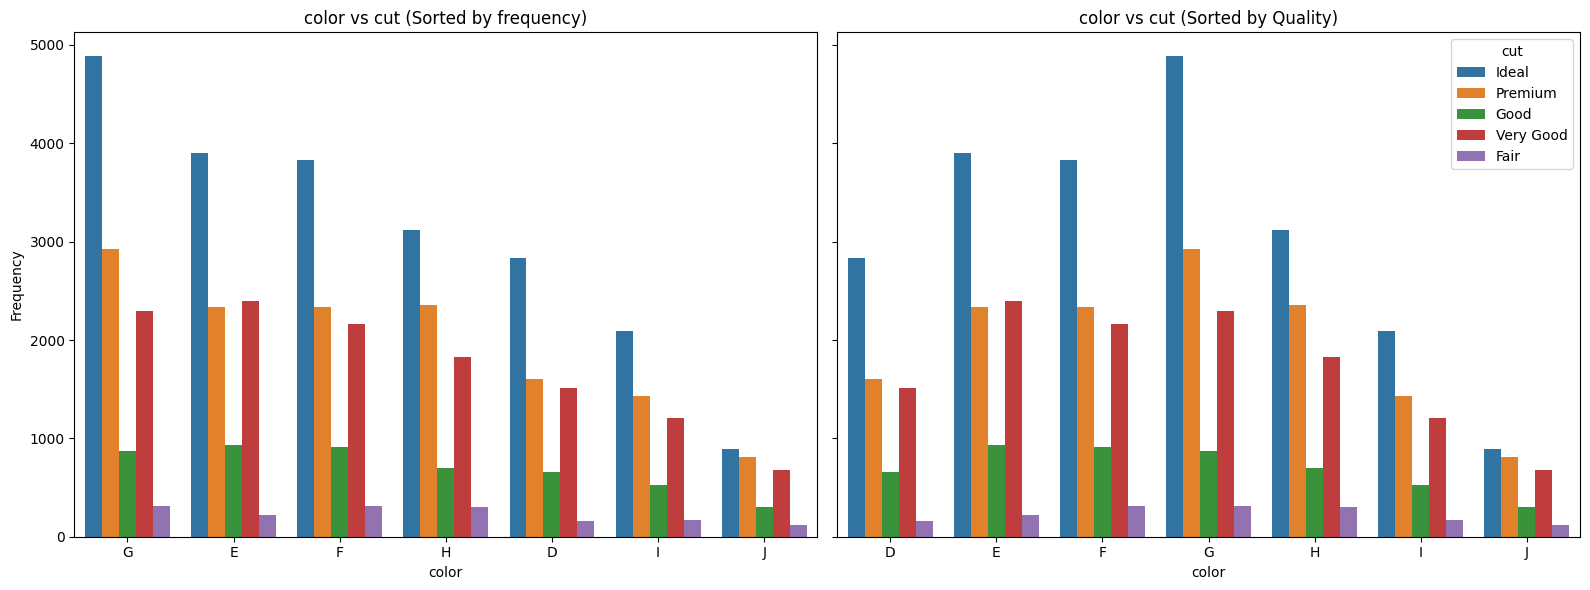

In [23]:
categorical_bivariat_distribution(df=df, x_col='color', hue_col='cut', manual_order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])

**Insight**:
- Dari perbandingan antara color dan cut, terlihat bahwa pada setiap kategori warna, kualitas potongan yang paling dominan adalah 'Ideal'.

- Hal ini menunjukkan bahwa berlian dengan berbagai warna cenderung memiliki proporsi potongan terbaik, yang dapat mengindikasikan bahwa potongan 'Ideal' merupakan standar umum yang banyak digunakan pada berlian, terlepas dari warnanya.

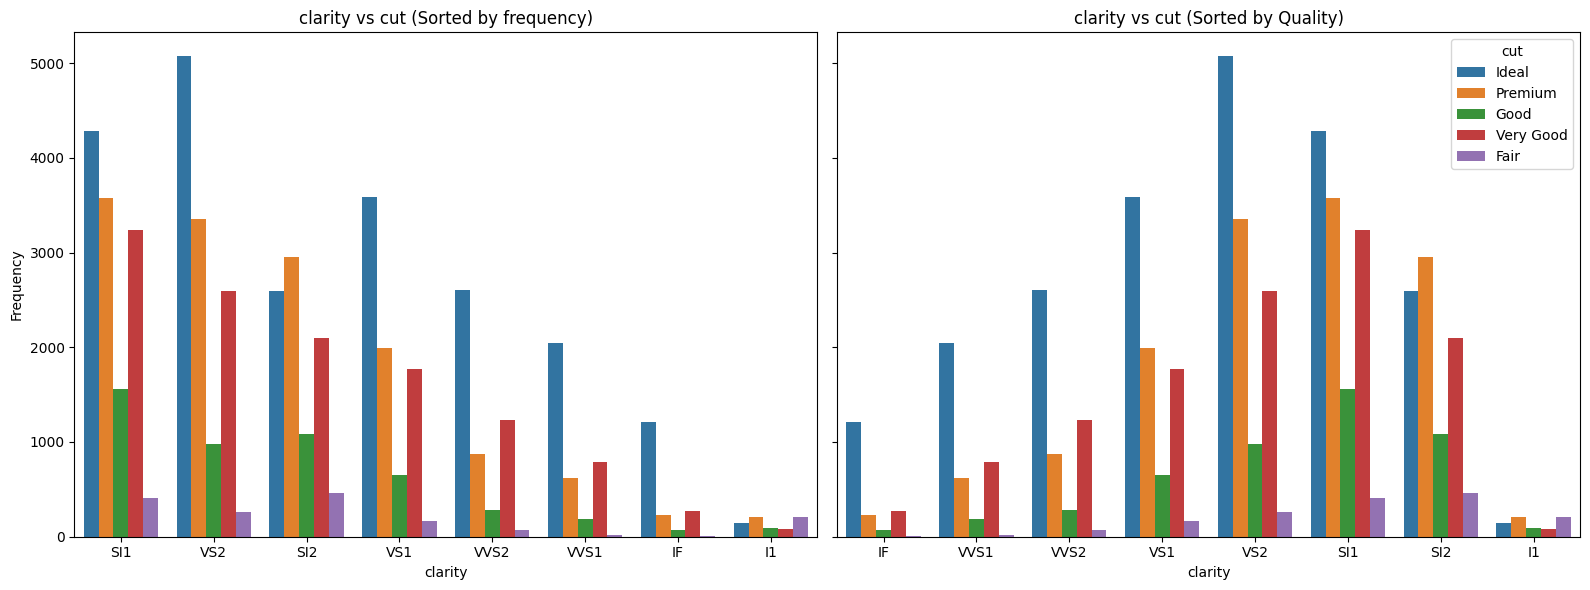

In [24]:
categorical_bivariat_distribution(df=df, x_col='clarity', hue_col='cut', manual_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])

**Insight**:
- Begitu juga ketika membandingkan antara clarity dan cut, terlihat bahwa pada hampir semua tingkat kejernihan (clarity), potongan yang paling dominan adalah 'Ideal'.

- Namun, terdapat pengecualian pada tingkat kejernihan I1 (Included 1), di mana potongan yang paling banyak ditemukan justru adalah 'Premium'.

- Hal ini menunjukkan bahwa meskipun potongan 'Ideal' menjadi standar umum, terdapat perbedaan preferensi atau kemungkinan keterbatasan kualitas potongan pada berlian dengan clarity terendah.

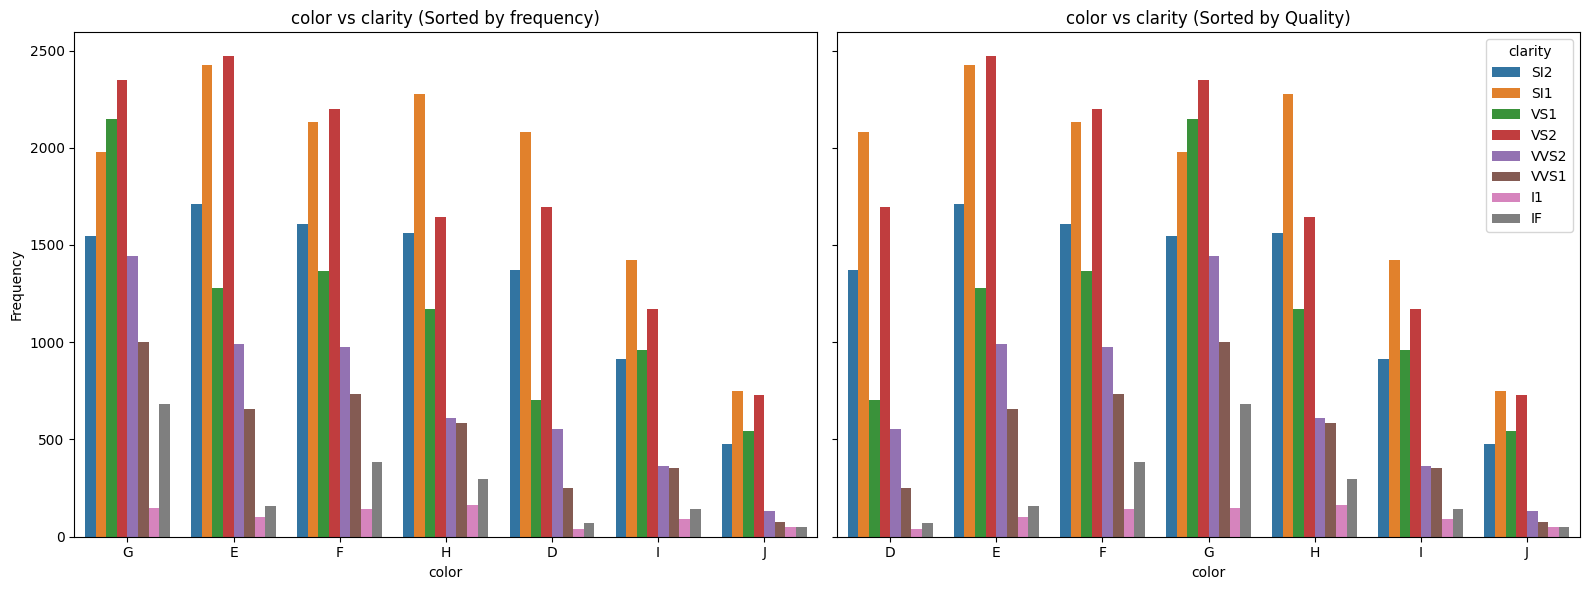

In [25]:
categorical_bivariat_distribution(df=df, x_col='color', hue_col='clarity', manual_order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])

**Insight**:
- Dari perbandingan antara color dan clarity, terlihat bahwa pada setiap kategori warna, tingkat kejernihan yang paling dominan adalah SI1 atau VS2. Artinya, berlian dengan warna apapun umumnya memiliki kejernihan menengah yang baik, dengan SI1 dan VS2 menjadi dua kategori clarity yang paling sering ditemukan.

- Hal ini menunjukkan bahwa berlian dengan berbagai warna cenderung memiliki kejernihan yang tergolong menengah hingga baik, yang kemungkinan kualitas yang paling banyak diminati.

### **4.5.4. Multivariat Analysis**

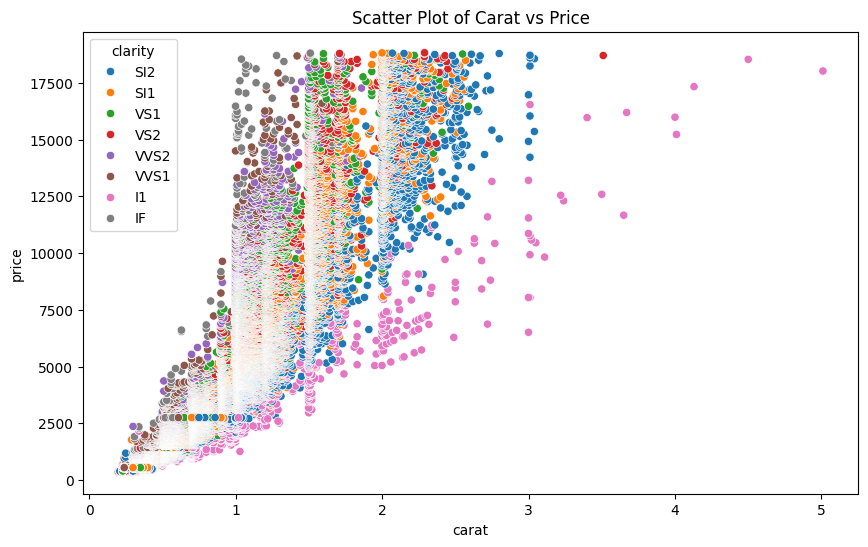

In [26]:
# carat vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='clarity')
plt.title('Scatter Plot of Carat vs Price')
plt.show()

**Insight**:
- Pada berlian dengan tingkat kejernihan IF cenderung memiliki carat yang lebih kecil, harganya tetap tinggi. Hal ini menunjukkan bahwa kejernihan yang sangat tinggi dapat secara signifikan meningkatkan nilai berlian, bahkan jika beratnya tidak besar.
- Meskipun clarity I1 secara umum dikaitkan dengan harga yang lebih rendah, terdapat anomali pada data di mana beberapa berlian dengan clarity I1 memiliki carat besar (3–5) dan harga tinggi. Hal ini menunjukkan bahwa carat dapat menjadi faktor yang sangat dominan dalam menentukan harga, bahkan ketika kejernihannya rendah.

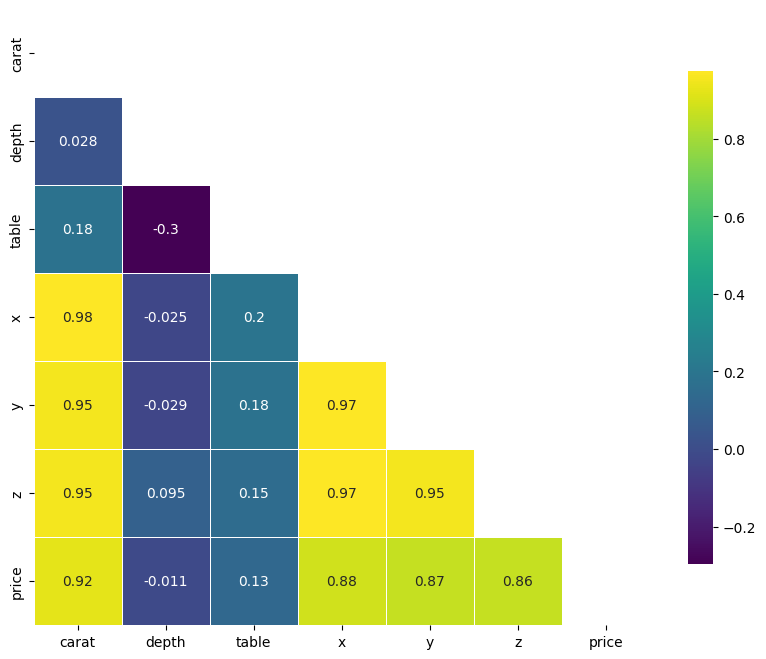

In [27]:
# numeric cols
num_cols = pd.DataFrame(df, columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])

# corr
corr = num_cols.corr()

# nasking to hide upper corr
mask = np.triu(np.ones_like(corr, dtype=bool))

# heatmap with mask
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='viridis',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.show()

**Insight**:
- Dari analisis korelasi antara fitur numerikal dan harga (price), menunjukkan bahwa carat adalah fitur yang paling berpengaruh terhadap harga berlian. Fitur lainnya, seperti dimensi X, Y, dan Z, juga memiliki pengaruh yang cukup signifikan. Sementara itu, depth dan table memiliki korelasi yang lebih lemah, menunjukkan bahwa faktor-faktor ini tidak terlalu memengaruhi harga dibandingkan dengan berat dan dimensi berlian.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## **5.1 Processing Numerical Features**

In [28]:
# drop Unnamed:0 columns as it is not going to be usefull for regression models
#create a copy of original dataset and move price to last
df_ = df.copy()
cols = [col for col in df_.columns if col != 'price'] + ['price']
df_ = df_[cols]

df_.drop('Unnamed: 0', axis=1, inplace=True)
df_.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [29]:
#slice for numerical columns
df_num = df_.select_dtypes(include=['int64', 'float64'])

#slice for categorical columns
df_cat = df_.select_dtypes(include='object')

In [30]:
#look for quasi-constant features

sel = VarianceThreshold(threshold=0.05)
sel.fit(df_num.drop(columns = 'price'))

print(f"{sum(sel.get_support())}" + " features are not quasi-constant")

6 features are not quasi-constant


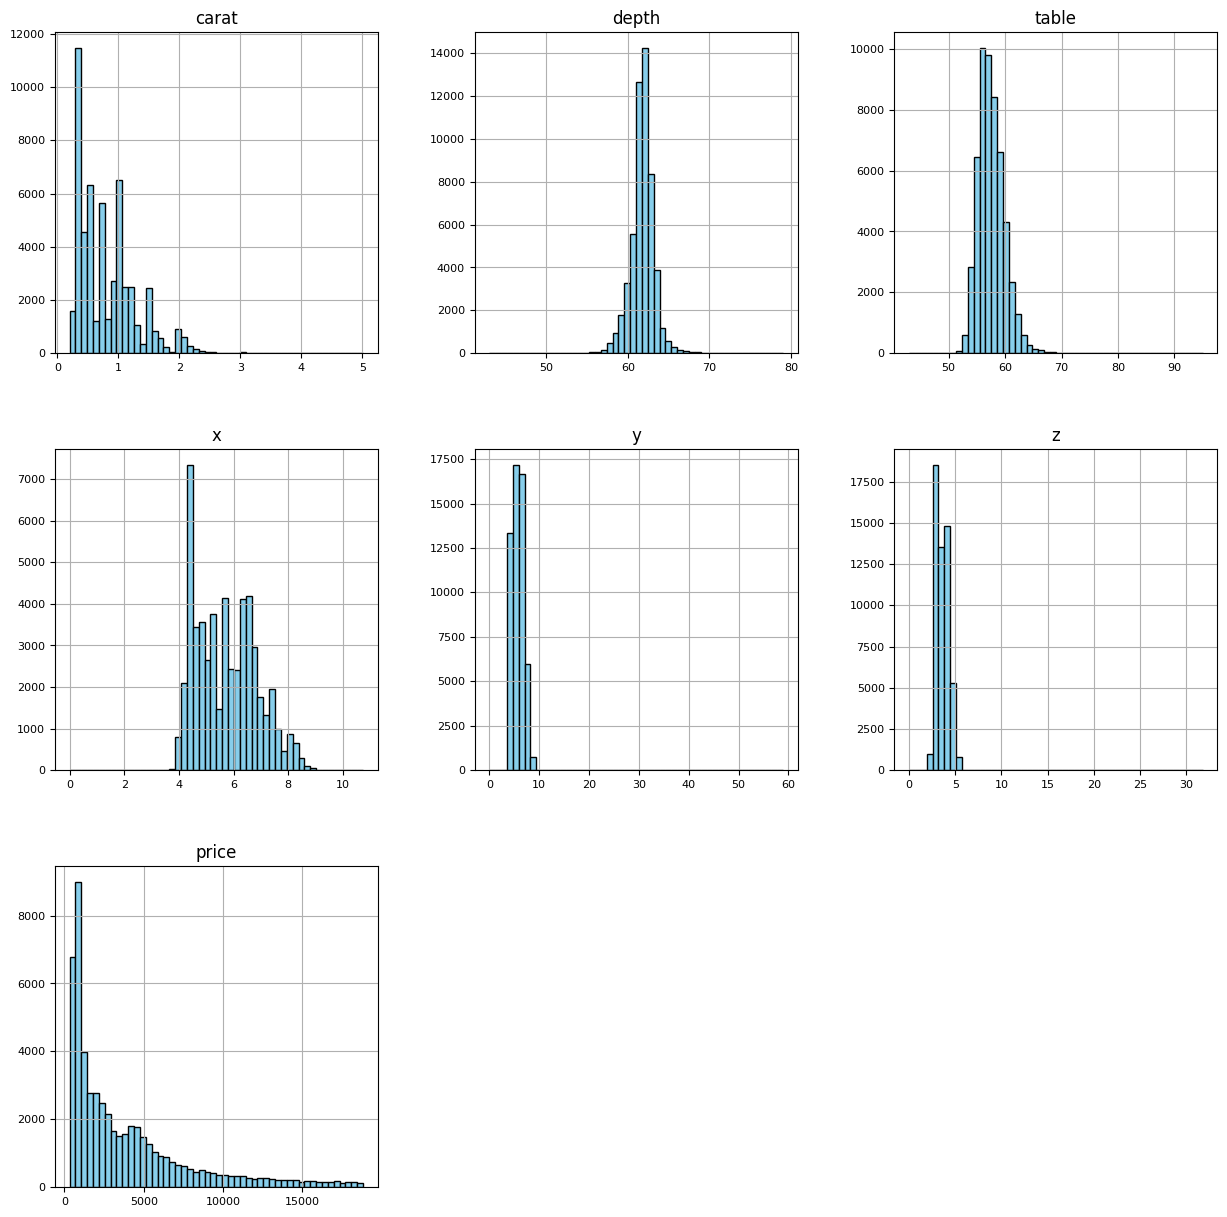

In [31]:
#distribution of numerical data

fig_ = df_num.hist(
    figsize=(15, 15),
    bins=50,
    xlabelsize=8,
    ylabelsize=8,
    color='skyblue',
    edgecolor='black'
)

In [32]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
df_num_corr = df_num.corr()["price"][:-1]

# Correlated features (r2 > 0.5)
high_corr_mask = abs(df_num_corr) >= 0.5
high_features_list = df_num_corr[high_corr_mask].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with price:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_corr_mask = (abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)
low_features_list = df_num_corr[low_corr_mask].sort_values(ascending=False)
print(f"{len(low_features_list)} slightly correlated values with price:\n{low_features_list}")

4 strongly correlated values with price:
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

0 slightly correlated values with price:
Series([], Name: price, dtype: float64)


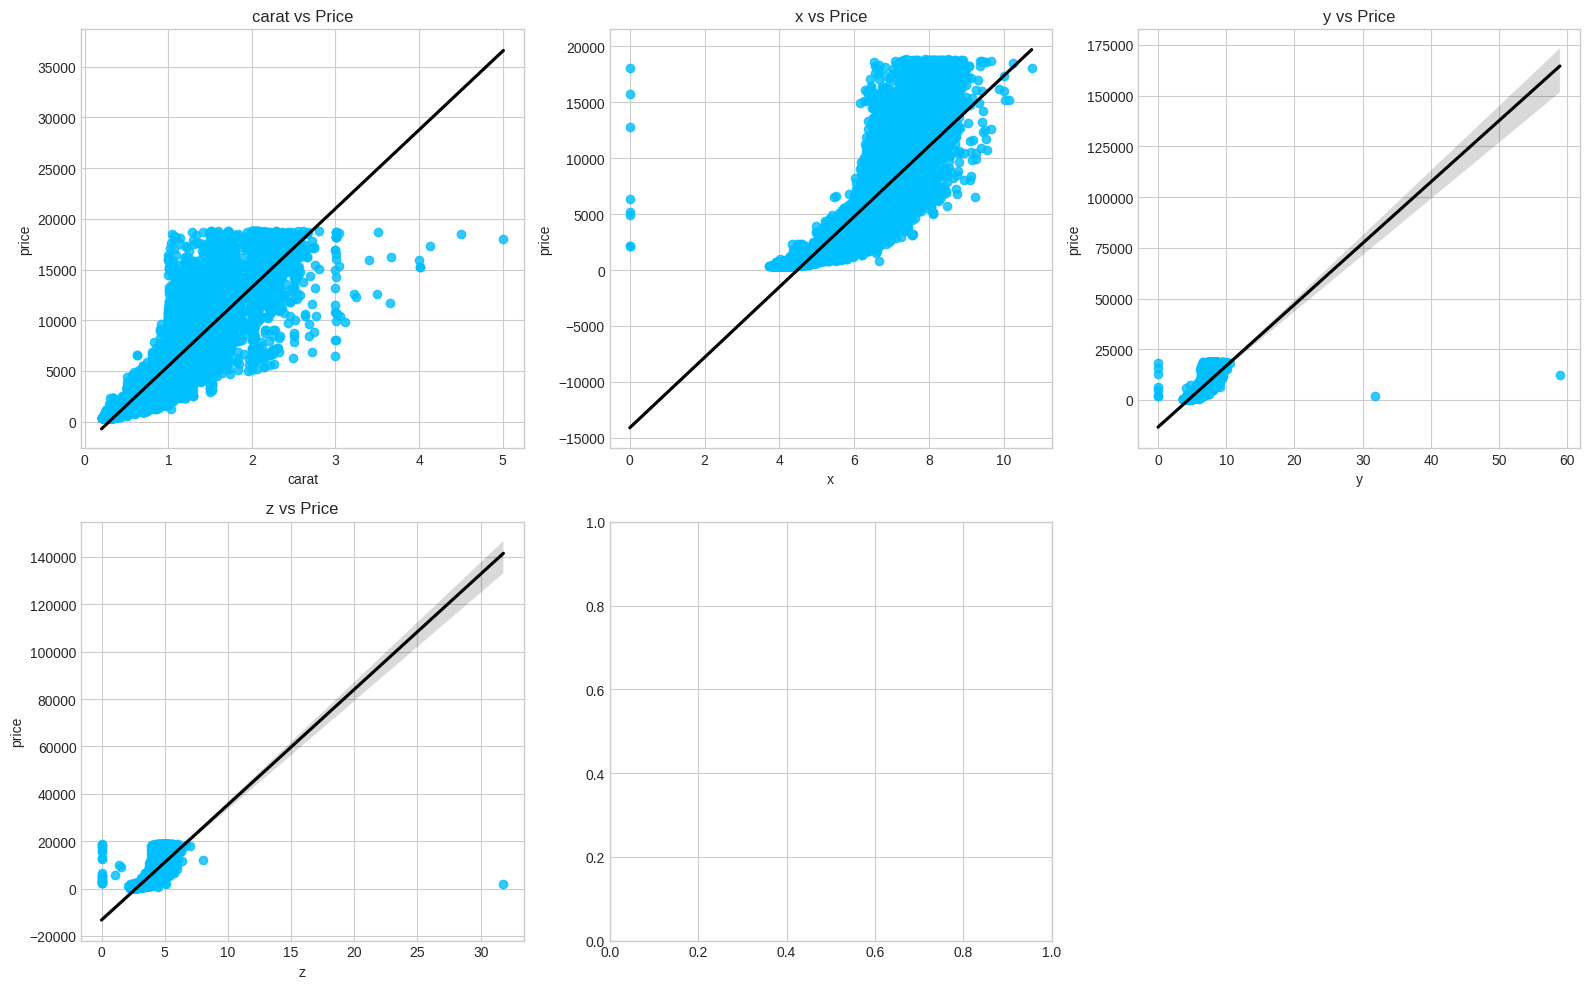

In [33]:
# Features with high correlation (absolute >= 0.5)
import math

strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()

# Ensure 'price' is included for y-axis plotting
if 'price' not in strong_features:
    strong_features.append('price')

# Subset of the dataframe
df_strong_features = df_num.loc[:, strong_features]

# Plot settings
plt.style.use("seaborn-v0_8-whitegrid")
rows = math.ceil((len(strong_features) - 1) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(16, 5 * rows))
axes = axes.flatten()  # Flatten in case of single row
plt.ylim(0,)

# Plot each feature against 'price'
for i, feature in enumerate(strong_features):
    if feature == 'price':
        continue
    sns.regplot(
        x=feature,
        y='price',
        data=df_strong_features,
        ax=axes[i],
        scatter_kws={"color": "deepskyblue"},
        line_kws={"color": "black"}
    )
    axes[i].set_title(f'{feature} vs Price')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

In [34]:
#keep strong features
df_num = df_strong_features
df_num

,carat,x,y,z,price
0,0.23,3.95,3.98,2.43,326
1,0.21,3.89,3.84,2.31,326
2,0.23,4.05,4.07,2.31,327
3,0.29,4.20,4.23,2.63,334
4,0.31,4.34,4.35,2.75,335
...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,2757
53936,0.72,5.69,5.75,3.61,2757
53937,0.70,5.66,5.68,3.56,2757
53938,0.86,6.15,6.12,3.74,2757


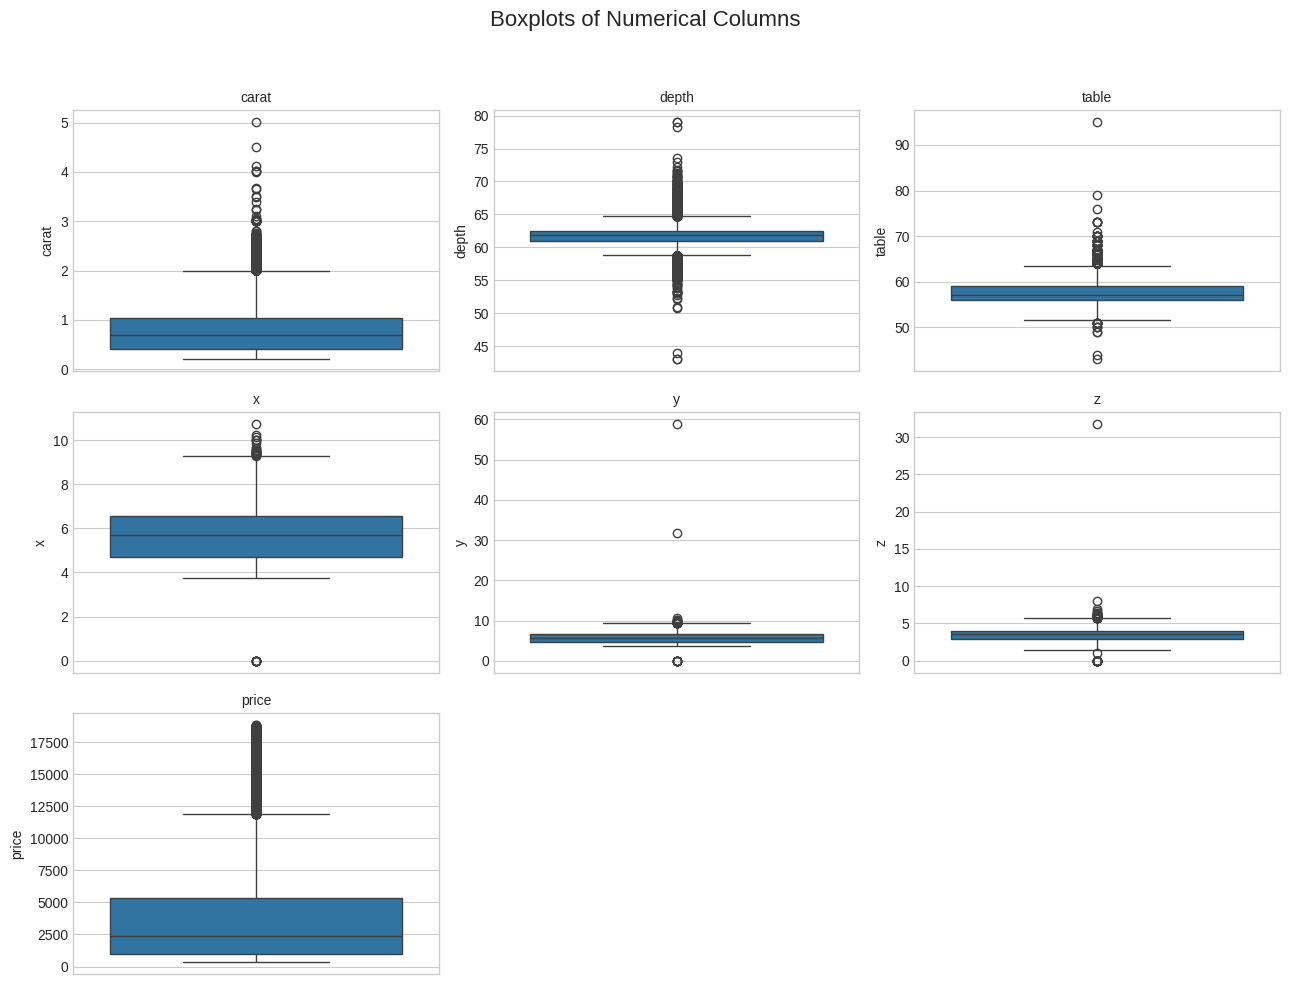

In [35]:
#create boxplot on numeric variable to observe potential outliers
num_cols = df_.select_dtypes(include=['int64', 'float64'])
num_cols.head()

plt.figure(figsize=(13, 10))
plt.suptitle(
    'Boxplots of Numerical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=16,
    fontfamily="sans-serif"
)

# Create individual boxplots for each numerical column
for i, col in enumerate(num_cols.columns, 1):
    plt.subplot((len(num_cols.columns) + 2) // 3, 3, i)
    sns.boxplot(y=df_[col])
    plt.title(col, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

## **5.2 Processing Categorical Features**

In [36]:
#categorical features overview
df_cat = df_cat.join(df_['price'])
df_cat

,cut,color,clarity,price
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335
...,...,...,...,...
53935,Ideal,D,SI1,2757
53936,Good,D,SI1,2757
53937,Very Good,D,SI1,2757
53938,Premium,H,SI2,2757


In [37]:
categorical_features = df_cat.select_dtypes(include='object').columns.tolist()
categorical_features

['cut', 'color', 'clarity']

<ipython-input-38-eb397c189092>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-38-eb397c189092>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-38-eb397c189092>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


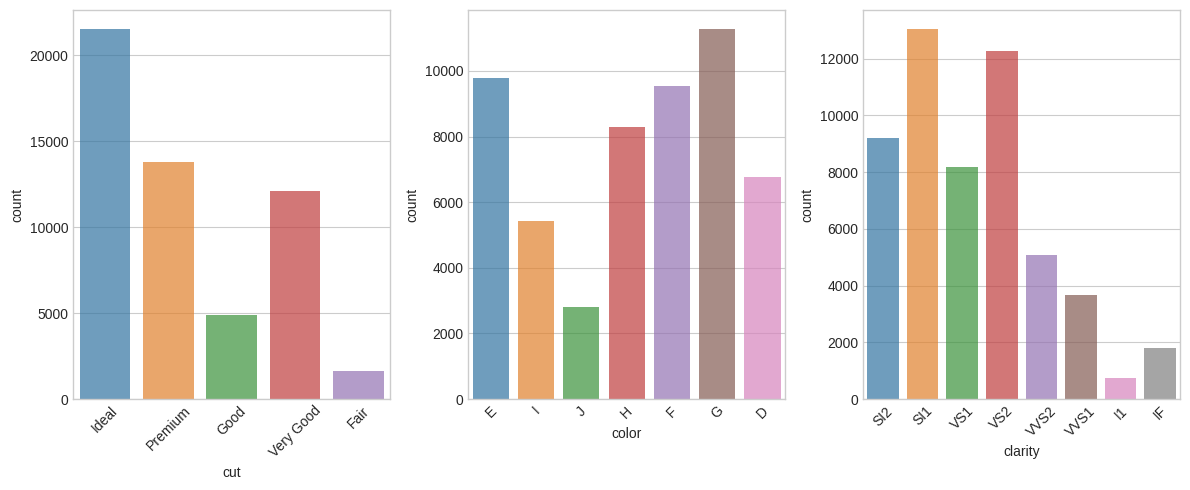

In [38]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    round(len(df_cat.columns)/3), 3, figsize=(12, 5))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_cat.columns) - 1:
        sns.countplot(
            x=df_cat.columns[i], alpha=0.7,
            data=df_cat, ax=ax, legend=False,
            hue=df_cat.columns[i])
        ax.set_xticklabels(
            ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()
plt.show()

<ipython-input-39-322f13456d7a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-39-322f13456d7a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-39-322f13456d7a>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


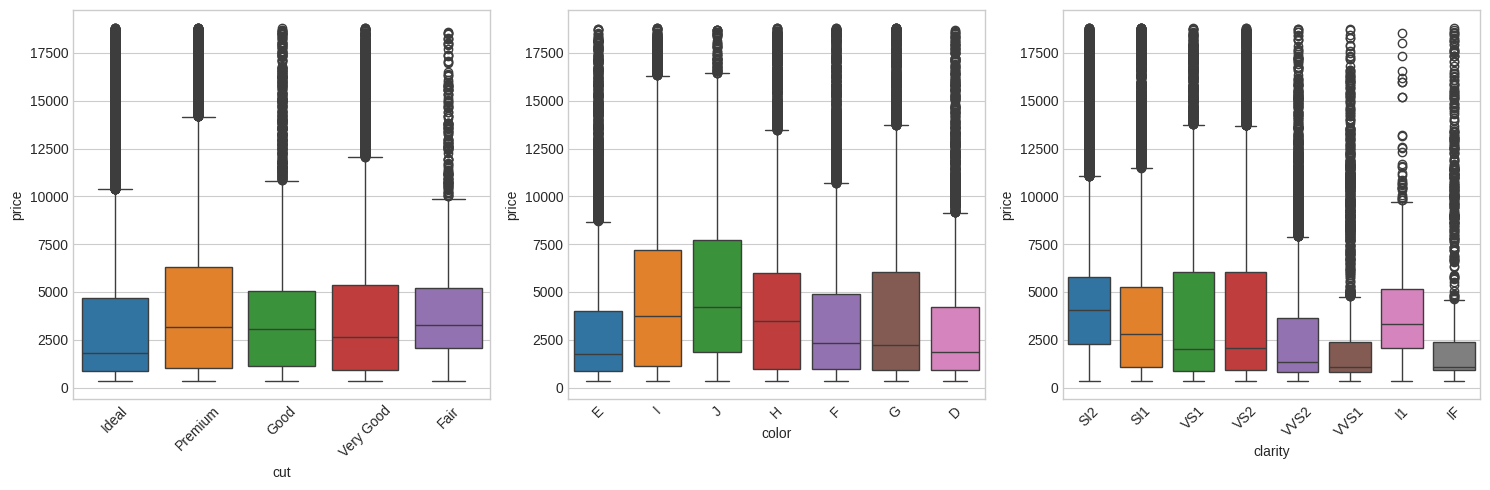

In [39]:
#see variation of diamond price for each categorical features

fig, axes = plt.subplots(
    round(len(df_cat.columns)/3), 3, figsize=(15, 5))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_cat.columns) - 1:
        sns.boxplot(
            x=df_cat.columns[i], y="price",
            data=df_cat, legend=False, ax=ax,
            hue=df_cat.columns[i])
        ax.set_xticklabels(
            ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

In [40]:
#transform ordinal categorical features
categories = [
    np.array(['Fair', 'Good','Very Good', 'Premium', 'Ideal']),
    np.array(['J', 'I', 'H', 'G', 'F', 'E', 'D']),
    np.array([ 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
]

In [41]:
#transform using ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=categories)
df_cat[categorical_features] = ordinal_encoder.fit_transform(df_cat[categorical_features])
df_cat.head()

,cut,color,clarity,price
0,4.0,5.0,1.0,326
1,3.0,5.0,2.0,326
2,1.0,5.0,4.0,327
3,3.0,1.0,3.0,334
4,1.0,0.0,1.0,335


In [42]:
#drop price from cat
df_cat.drop('price', axis=1, inplace=True)

In [43]:
#merge categorical and numerical dataset
df_all = pd.concat([df_cat, df_num], axis=1)
df_all

,cut,color,clarity,carat,x,y,z,price
0,4.0,5.0,1.0,0.23,3.95,3.98,2.43,326
1,3.0,5.0,2.0,0.21,3.89,3.84,2.31,326
2,1.0,5.0,4.0,0.23,4.05,4.07,2.31,327
3,3.0,1.0,3.0,0.29,4.20,4.23,2.63,334
4,1.0,0.0,1.0,0.31,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...
53935,4.0,6.0,2.0,0.72,5.75,5.76,3.50,2757
53936,1.0,6.0,2.0,0.72,5.69,5.75,3.61,2757
53937,2.0,6.0,2.0,0.70,5.66,5.68,3.56,2757
53938,3.0,2.0,1.0,0.86,6.15,6.12,3.74,2757


## 5.3 Treating Outliers

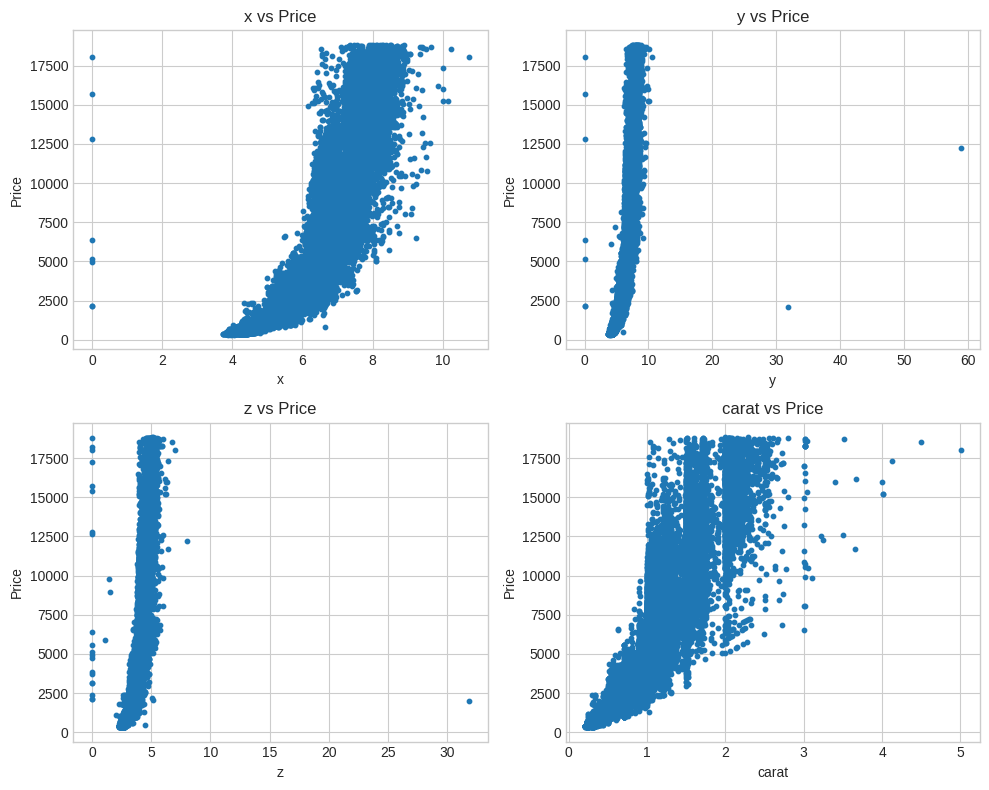

In [44]:
# Finding Outliers

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Features to plot
features = ['x', "y", "z","carat"]

# Iterate over each feature and plot against SalePrice
for i, feature in enumerate(features):
    ax = axs[i]
    ax.scatter(df_all[feature], df_all['price'], s=10)
    ax.set_title(f'{feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

fig.tight_layout()
plt.show()

In [45]:
# Outliers in "z"
outliers1 = df_all[(df_all["x"] < 2)].index.tolist()

# Outliers in "y"
outliers2 = df_all[(df_all["y"] >= 10) |
    (df_all["y"] < 2)].index.tolist()

# Outliers in "GarageArea"
outliers3 = df_all[(df_all["z"] >= 10) |
    (df_all["z"] < 2)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_all_new = df_all.drop(df_all.index[outliers])

# Reset index
df_all_new = df_all_new.reset_index().drop("index", axis=1)

[26243, 24067, 2314, 26123, 25998, 49556, 49557, 21654, 27415, 48410, 2207, 13601, 27429, 49189, 14635, 11182, 51506, 4791, 10167, 11963, 24520, 24394, 15951, 20694, 27739, 5471, 27112, 27630, 27503]


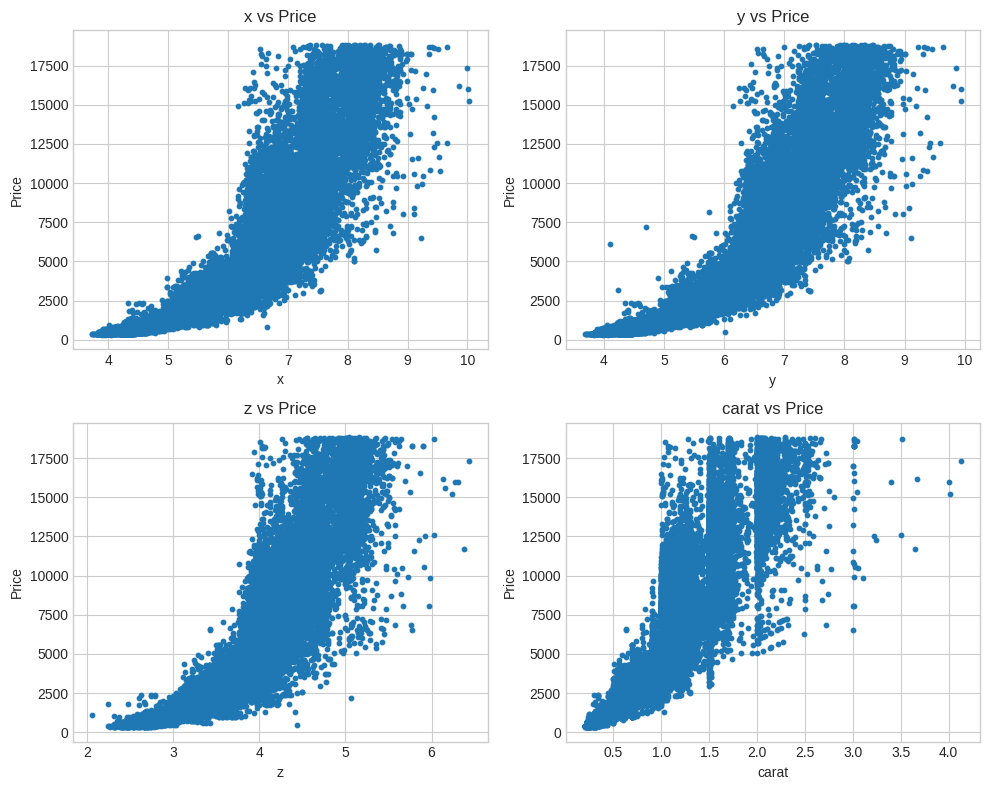

In [46]:
# after removal

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Features to plot
features = ['x', "y", "z","carat"]

# Iterate over each feature and plot against SalePrice
for i, feature in enumerate(features):
    ax = axs[i]
    ax.scatter(df_all_new[feature], df_all_new['price'], s=10)
    ax.set_title(f'{feature} vs Price')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

fig.tight_layout()
plt.show()

consider removing outlier using IQR

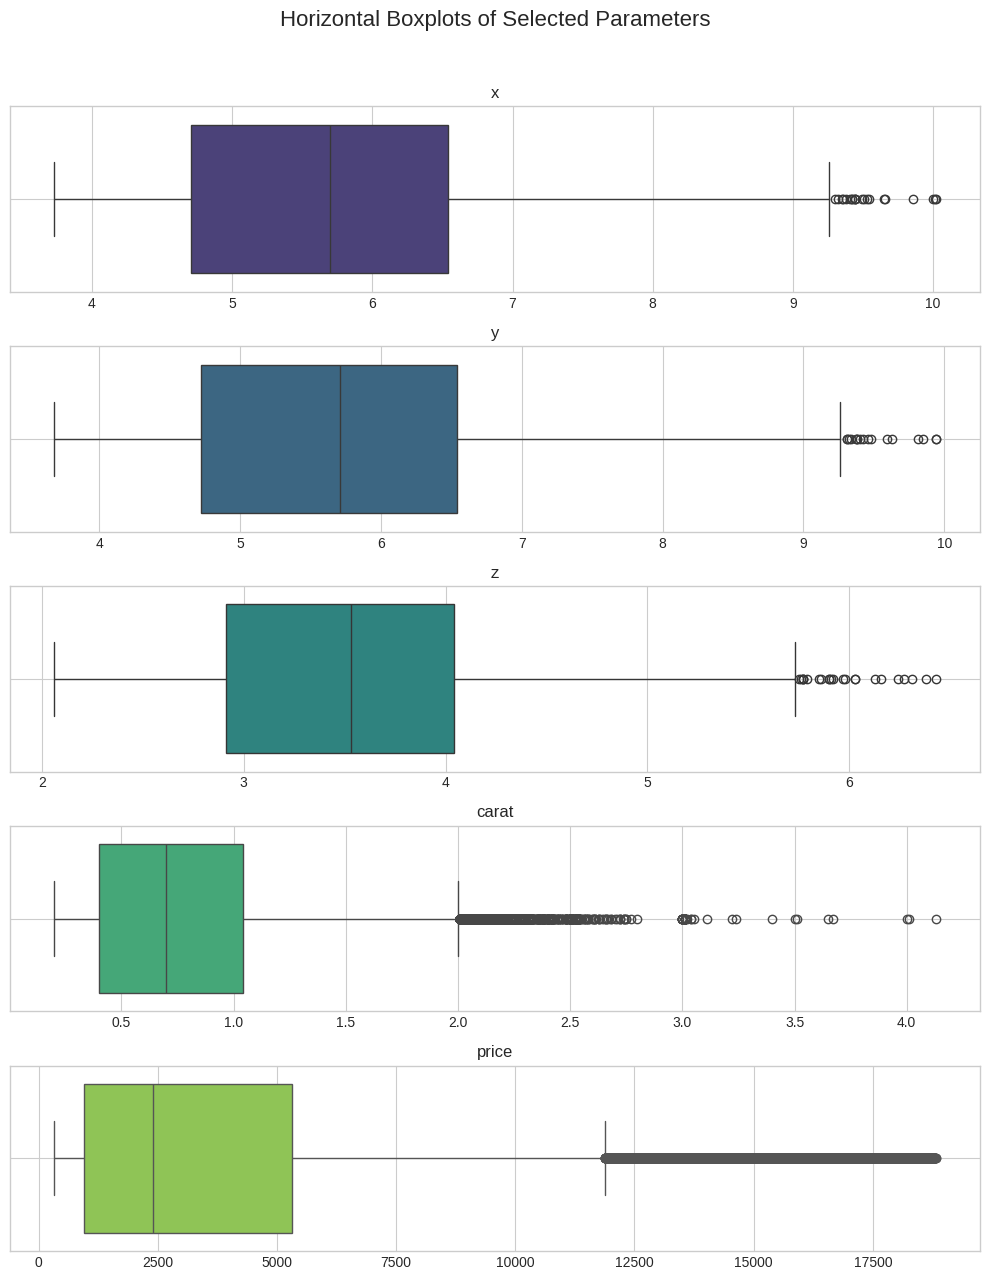

In [47]:
selected_cols = ['x', 'y', 'z', 'carat', 'price']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(selected_cols), ncols=1, figsize=(10, 2.5 * len(selected_cols)))
plt.suptitle("Horizontal Boxplots of Selected Parameters", fontsize=16, y=1.02)

# Create a boxplot for each variable
for i, col in enumerate(selected_cols):
    sns.boxplot(x=df_all_new[col], ax=axes[i], color=sns.color_palette('viridis', len(selected_cols))[i])
    axes[i].set_title(col, loc='center')
    axes[i].set_xlabel("")  # optional: hide x-axis label
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## 5.4 Preparation for Modeling

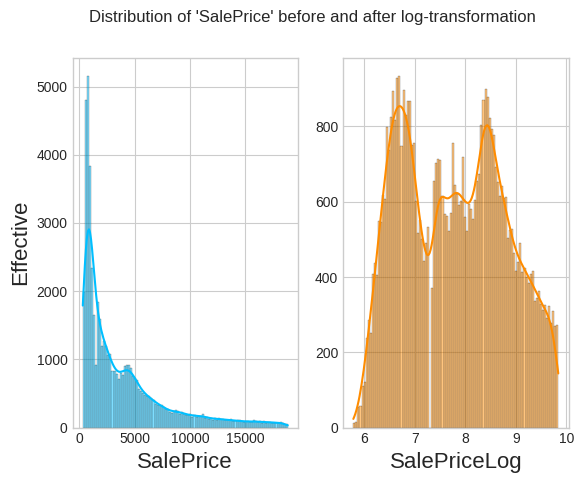

In [48]:
# Log transformation of the target variable "SalePrice"
df_all_new["SalePriceLog"] = np.log(df_all_new['price'])

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=df_all_new["price"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Effective", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=df_all_new["SalePriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("", fontsize=16);

In [49]:
df_all_new.drop('price', axis=1, inplace=True)

## 5.2 Standardisation

In [50]:
#split the data
X = df_all_new.drop('SalePriceLog', axis=1)
y = df_all_new['SalePriceLog']

print(X.shape)
print(y.shape)

(53911, 7)
(53911,)


Text(0.5, 1.0, 'Histogram for SalePriceLog')

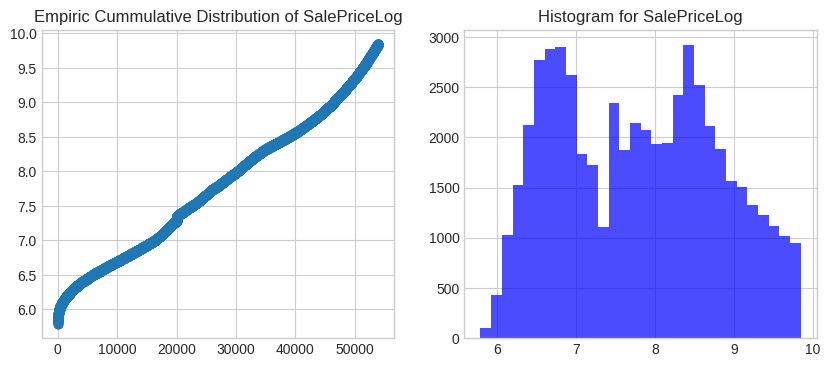

In [51]:
# Visualization on 'SalePriceLog'

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot Empiric Cummulative Distribution
sorted_data = y.sort_values(ignore_index=True)
axs[0].scatter(x=sorted_data.index, y=sorted_data)
axs[0].set_title('Empiric Cummulative Distribution of SalePriceLog')

# Plot histogram of 'SalePrice'
axs[1].hist(y, bins=30, color='blue', alpha=0.7)
axs[1].set_title('Histogram for SalePriceLog')

might have to deal with the twin peaks later on

In [52]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(min(y) + 0.5, max(y) - 0.5, 10)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y_binned, shuffle=True, random_state=42) ##test with random_state

print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(43128, 7)
y_train:(43128,)

X_test:(10783, 7)
y_test:(10783,)


In [76]:
# Standardize the data
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

In [54]:
X_train.head()

,cut,color,clarity,carat,x,y,z
0,0.087168,-0.236566,-0.638747,-0.629471,-0.564174,-0.606070,-0.519718
1,0.087168,1.525339,-0.031925,-0.544715,-0.465778,-0.425865,-0.461788
2,-0.807075,-1.998470,-0.638747,1.510631,1.421637,1.466286,1.377477
3,0.087168,-0.823867,-1.245569,0.429985,0.616578,0.583282,0.551980
4,0.087168,-0.236566,-0.031925,1.553010,1.618429,1.547378,1.377477


# **6. Model Bulding** (use X_train, X_test, y_train, y_test)

## **6.1 Training Model**

In [55]:
# build model to train
models = []

# Ridgre Regression
models.append(
    (
        'Rigde Regression',
        Ridge(
            random_state=42
        )
    )
)

# Lasso Regression
models.append(
    (
        'Lasso Regression',
        Lasso(
            random_state=42
        )
    )
)

# ElasticNet
models.append(
    (
        'ElasticNet',
        ElasticNet(
            random_state=42
        )
    )
)

# Decision Tree
models.append(
    (
        'Decision Tree Regressor',
        DecisionTreeRegressor(
            random_state=42
        )
    )
)

# Random Forest
models.append(
    (
        'Random Forest Regressor',
        RandomForestRegressor(
            random_state=42
        )
    )
)

# XGBoost
models.append(
    (
        'XGBoost Regressor',
        XGBRegressor(
            random_state=42
        )
    )
)

mse_result = []
r2_result = []

col = ['Algorithm', 'Mean Squared Error (MSE)', 'R-squared (R²)']
model_results = pd.DataFrame(columns=col)

# Evaluate model
i = 0
for name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_result.append(mse)
    r2_result.append(r2)

    model_results.loc[i] = [name, mse, r2]
    i += 1

# Display results
model_results

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Algorithm,Mean Squared Error (MSE),R-squared (R²)
0,Rigde Regression,0.021704,0.979001
1,Lasso Regression,1.033594,-0.000014
2,ElasticNet,0.395979,0.616886
3,Decision Tree Regressor,0.014972,0.985514
4,Random Forest Regressor,0.007921,0.992337
5,XGBoost Regressor,0.007667,0.992582


## **6.2 Train Model + GridSearchCV**

### **6.2.1 Ridge Regression**

In [56]:
# Initialize the Ridge Regression model
ridge = Ridge()

# Define the grid of alpha values to search
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV with 5-fold cross-validation
ridge_cv = GridSearchCV(ridge, params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# Make predictions on the test set
y_ridge_pred = ridge_cv.predict(X_test)

# Evaluate model performance
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared (R²):", r2_ridge)

Best alpha: 0.1
Mean Squared Error (MSE): 0.021704819859638663
R-squared (R²): 0.9790003436645011


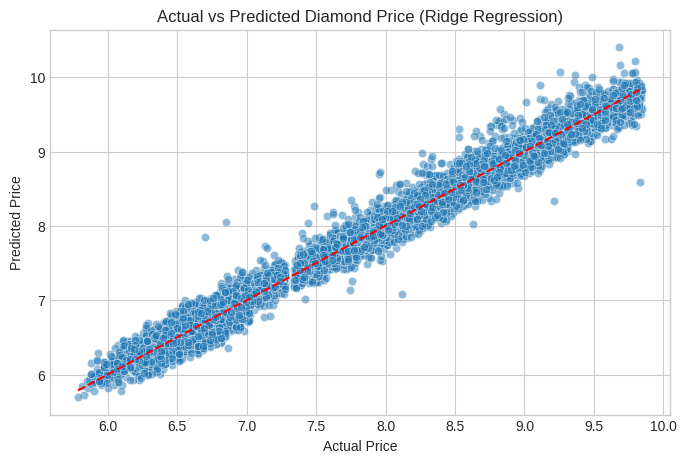

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test.values.flatten(), y=y_ridge_pred.flatten(), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Price (Ridge Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

### **6.2.2 Lasso Regression**

In [58]:
# Initialize the Lasso Regression model
lasso = Lasso()

# Define the grid of alpha values to search
params = {'alpha': [0.01, 0.1, 1]}

# Perform GridSearchCV with 5-fold cross-validation
lasso_cv = GridSearchCV(lasso, params, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

# Predict on test set
y_lasso_pred = lasso_cv.predict(X_test)

# Evaluate model performance
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print("Best alpha:", lasso_cv.best_params_['alpha'])
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R²):", r2_lasso)

Best alpha: 0.01
Mean Squared Error (MSE): 0.03359385495815336
R-squared (R²): 0.9674975690345323


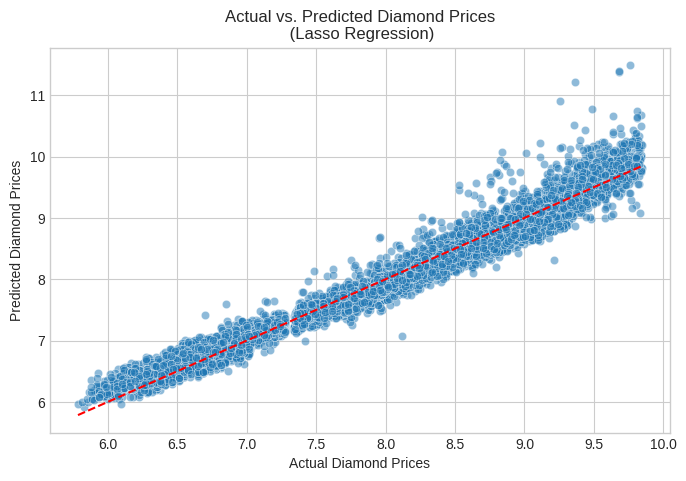

In [59]:
plt.figure(figsize=(8, 5))
plt.title("Actual vs. Predicted Diamond Prices\n (Lasso Regression)")
sns.scatterplot(x=y_test.values.flatten(), y=y_lasso_pred.flatten(), alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Diamond Prices")
plt.ylabel("Predicted Diamond Prices")
plt.show()

### **6.2.3 ElasticNet**

In [60]:
# Initialize the ElasticNet
elastic_net = ElasticNet()

# Define the grid of alpha values to search
params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]}

# Perform GridSearchCV with 5-fold cross-validation
elastic_net_cv = GridSearchCV(elastic_net, params, cv=5, scoring='r2')
elastic_net_cv.fit(X_train, y_train)

# Predict on test set
y_elastic_pred = elastic_net_cv.predict(X_test)

# Evaluate model performance
mse_elastic = mean_squared_error(y_test, y_elastic_pred)
r2_elastic = r2_score(y_test, y_elastic_pred)

print("Best alpha:", elastic_net_cv.best_params_['alpha'])
print("Mean Squared Error (MSE):", mse_elastic)
print("R-squared (R²):", r2_elastic)

Best alpha: 0.01
Mean Squared Error (MSE): 0.024197502874539145
R-squared (R²): 0.976588644926398


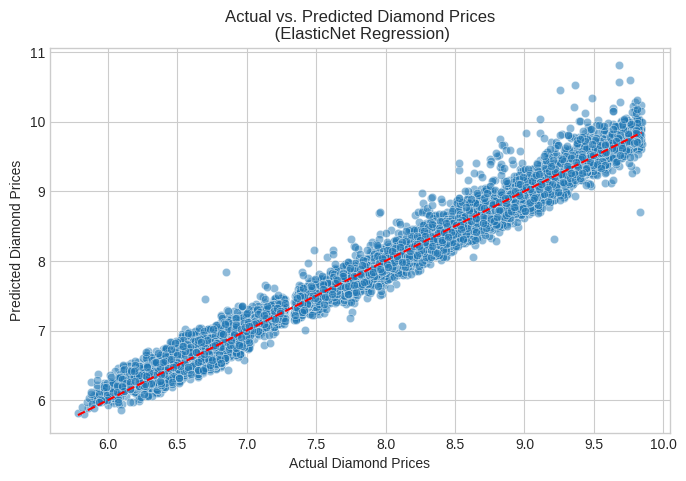

In [61]:
plt.figure(figsize=(8, 5))
plt.title("Actual vs. Predicted Diamond Prices\n (ElasticNet Regression)")
sns.scatterplot(x=y_test.values.flatten(), y=y_elastic_pred.flatten(), alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Diamond Prices")
plt.ylabel("Predicted Diamond Prices")
plt.show()

### **6.2.4 Decision Tree Regression**

In [62]:
# Initialize Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Define a parameter grid to tune the model
params = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
tree_cv = GridSearchCV(tree, params, cv=5, scoring='r2', n_jobs=-1)
tree_cv.fit(X_train, y_train)

# Make predictions
y_tree_pred = tree_cv.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_tree_pred)
r2_tree = r2_score(y_test, y_tree_pred)

print("Best parameters:", tree_cv.best_params_)
print("Mean Squared Error (MSE):", mse_tree)
print("R-squared (R²):", r2_tree)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error (MSE): 0.011088388035083349
R-squared (R²): 0.9892718603721559


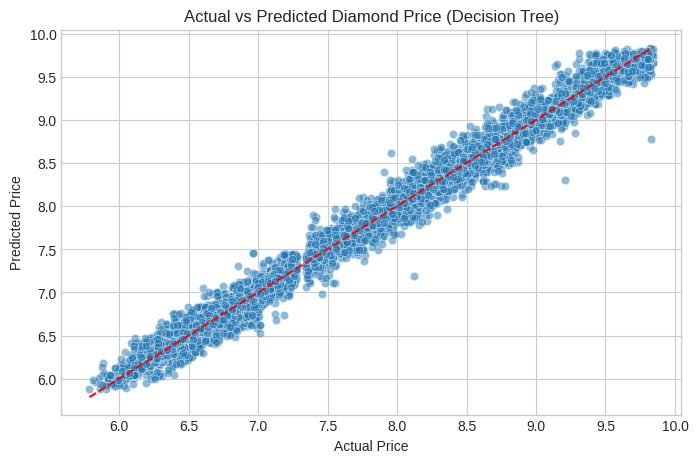

In [63]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_tree_pred.flatten(), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Price (Decision Tree)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

### **6.2.5 Random Forest Regressor**

In [64]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV with 5-fold cross-validation
rf_cv = GridSearchCV(rf, params, cv=5, scoring='r2', n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_cv.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print("Best parameters:", rf_cv.best_params_)
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R²):", r2_rf)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error (MSE): 0.007760612948899617
R-squared (R²): 0.9924915200433077


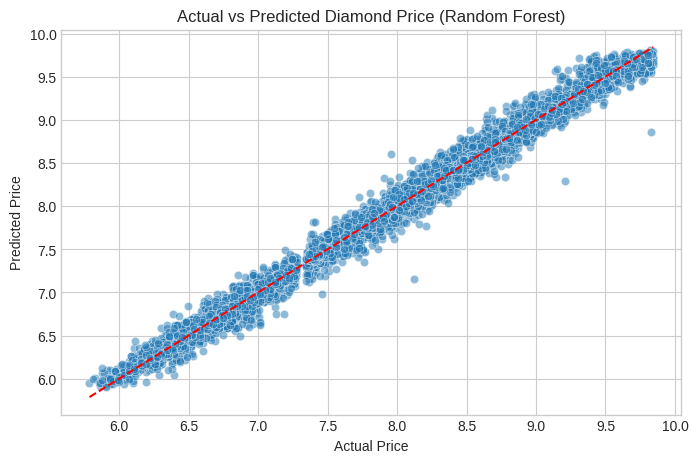

In [65]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_rf_pred.flatten(), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Price (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

### **6.2.6 XGBoost Regression**

In [66]:
# Initialize the XGBoost Regressor
xgbr = XGBRegressor(random_state=42)

# Define hyperparameters
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
}

# perform GridSearchCV with 5-fold cross-validation
xgbr_cv = GridSearchCV(xgbr, params, cv=5, scoring='r2', n_jobs=-1)
xgbr_cv.fit(X_train, y_train)

# make predictions on the test set
y_xgbr_pred = xgbr_cv.predict(X_test)

# Evaluate the model
mse_xgbr = mean_squared_error(y_test, y_xgbr_pred)
r2_xgbr = r2_score(y_test, y_xgbr_pred)

print("Best parameters:", xgbr_cv.best_params_)
print("Mean Squared Error (MSE):", mse_xgbr)
print("R-squared (R²):", r2_xgbr)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Mean Squared Error (MSE): 0.007127917837351561
R-squared (R²): 0.9931036829948425


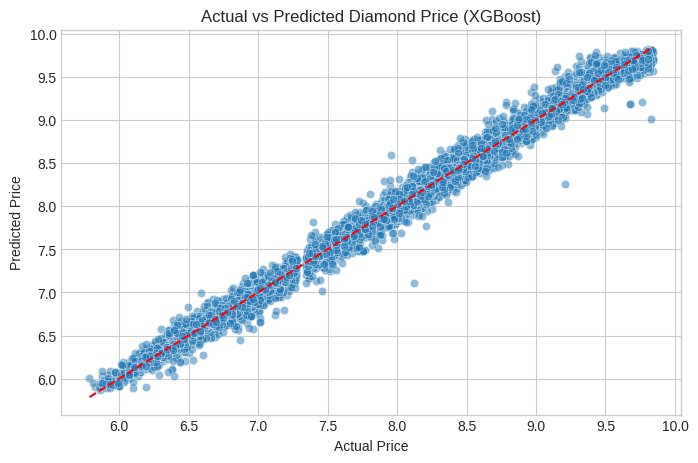

In [67]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_xgbr_pred.flatten(), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Price (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

In [68]:
# Show result every hypertunned models
data = [
    {
        'Algorithms': 'Ridge Regression',
        'Mean Squared Error (MSE)': mse_ridge,
        'R-squared (R²)': r2_ridge
    },
    {
        'Algorithms': 'Lasso Regression',
        'Mean Squared Error (MSE)': mse_lasso,
        'R-squared (R²)': r2_lasso
    },
    {
        'Algorithms': 'ElasticNet',
        'Mean Squared Error (MSE)': mse_elastic,
        'R-squared (R²)': r2_elastic
    },
    {
        'Algorithms': 'Decision Tree Regressor',
        'Mean Squared Error (MSE)': mse_tree,
        'R-squared (R²)': r2_tree
    },
    {
        'Algorithms': 'Random Forest Regressor',
        'Mean Squared Error (MSE)': mse_rf,
        'R-squared (R²)': r2_rf
    },
    {
        'Algorithms': 'XGBoost Regression',
        'Mean Squared Error (MSE)': mse_xgbr,
        'R-squared (R²)': r2_xgbr
    }
]

model_results_cv = pd.DataFrame(data, columns=['Algorithms', 'Mean Squared Error (MSE)', 'R-squared (R²)'])
model_results_cv

,Algorithms,Mean Squared Error (MSE),R-squared (R²)
0,Ridge Regression,0.021705,0.979000
1,Lasso Regression,0.033594,0.967498
2,ElasticNet,0.024198,0.976589
3,Decision Tree Regressor,0.011088,0.989272
4,Random Forest Regressor,0.007761,0.992492
5,XGBoost Regression,0.007128,0.993104


## **6.3 Best Model**

| Algorithms               | MSE Before | MSE After | R² Before | R² After |
|--------------------------|------------|-----------|-----------|----------|
| Ridge Regression          | 0.021704   | 0.021705  | 0.979001  | 0.979000 |
| Lasso Regression          | 1.033594   | 0.033594  | -0.000014 | 0.967498 |
| ElasticNet                | 0.395979   | 0.024198  | 0.616886  | 0.976589 |
| Decision Tree Regressor   | 0.014972   | 0.011088  | 0.985514  | 0.989272 |
| Random Forest Regressor   | 0.007921   | 0.007761  | 0.992337  | 0.992492 |
| XGBoost Regressor         | 0.007667   | 0.007128  | 0.992582  | 0.993104 |

**Insight**:
- Dari hasil latih model tanpa dan dengan hypertuning parameter, model terbaik adalah XGBoost Regressor setelah tuning dengan GridSearchCV dengan nilai Mean Squared Error (MSE) yakni 0.007128 dan R-squared (R²) yakni 0.993104. Hasil ini menunjukkan XGBoost tunned dapat mempelajari data dengan baik.

# **7. Save Model**

In [103]:
# Simpan model ke file .pkl
with open('xgbr_tunned_model.pkl', 'wb') as f:
    pickle.dump(xgbr_cv, f)

# Simpan scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(std_scale, f)

# Simpan Ordinal Encoder
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder, f)

# **8. Inference Test Model**

In [104]:
# Muat model, scaler, dan encoder
with open('xgbr_tunned_model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('ordinal_encoder.pkl', 'rb') as file:
    ordinal_encoder = pickle.load(file)

# Data baru
input_data = pd.DataFrame([{
    'cut': 'Ideal',
    'color': 'D',
    'clarity': 'IF',
    'carat': 1.00,
    'x': 3.95,
    'y': 3.98,
    'z': 2.43
}], columns=['cut', 'color', 'clarity', 'carat', 'x', 'y', 'z'])

# Encode kolom kategorikal
input_data[categorical_features] = ordinal_encoder.transform(input_data[categorical_features])

# Standarisasi semua kolom
features_scaled = scaler.transform(input_data)

# Prediksi log(price)
predicted_log_price = model.predict(features_scaled)[0]

# Kembalikan ke harga asli
predicted_price = np.exp(predicted_log_price)

print(f"Predicted Price: ${predicted_price:,.2f}")

Predicted Price: $17,112.46
